<a href="https://colab.research.google.com/github/smckee17-glitch/smckee17glitch.io/blob/master/Analysis_of_TV_Series_by_Platform.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')


Mounted at /content/gdrive


#Intro

*TV shows on Netflix, Prime Video, Hulu, and Disney Plus* is a comprehensive data set of TV series available on the various streaming platforms. The dataset has 11 columns and 5612 rows that include the TV show ID, TV show title, year TV series was produced, target age group, IMDb rating, Rotten Tomatoes %, and whether the show is available on Netflix, Prime Video, Hulu, or Disney+.The data set contains both categorical and quantitative data types. The only categorical data is nominal (the titles of the TV series). The rest of the data is quantitative, all of which are discrete except the year TV series were produced which is continuous. 


In [ ]:
# Import 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib.image as mpimg
import math
import plotly.express as px
import plotly.graph_objects as go

from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage,
                                  AnnotationBbox)
from plotly.colors import n_colors
from IPython.display import Image


In [ ]:
#Read in our GDrive-mounted csv
df = pd.read_csv('/content/gdrive/My Drive/Colab Datasets/tv_shows.csv')
df.head()

,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,type
0,0,Breaking Bad,2008,18+,9.5,96%,1,0,0,0,1
1,1,Stranger Things,2016,16+,8.8,93%,1,0,0,0,1
2,2,Money Heist,2017,18+,8.4,91%,1,0,0,0,1
3,3,Sherlock,2010,16+,9.1,78%,1,0,0,0,1
4,4,Better Call Saul,2015,18+,8.7,97%,1,0,0,0,1


## Features
**Age**: is the age range advised for viewers to watch the content. 

**IMDb**: is an online database of information related to films, television programs, home videos, video games, and streaming content online – including cast, production crew, and personal biographies, plot summaries, trivia, ratings, and fan, and critical reviews. Ratings are scored on a scale of 1-10.

**Rotten Tomatoes**: is an American review-aggregation website for film and television. Ratings are score on a scale of 1-100%.

**Netflix**: is a subscription-based streaming service that allows our members to watch a wide variety of award-winning TV shows, movies, documentaries, and more on thousands of internet-connected devices.

**Hulu**: is the leading premium streaming service offering live and on-demand TV and movies, with and without commercials, both in and outside the home.

**Prime Video**:  is a video streaming service available for Amazon Prime members. With an eligible Amazon Prime membership, you have access to thousands of Prime Video titles at no additional cost.

**Disney+**: is the exclusive home for your favorite movies and TV shows from Disney, Pixar, Marvel, Star Wars, and National Geographic.

#Comparing Streaming Services

In [ ]:
df.describe()

,ID,Year,IMDb,Netflix,Hulu,Prime Video,Disney+,type,rating_Netflix,rating_Hulu
count,5611.000000,5611.000000,4450.000000,5611.000000,5611.000000,5611.000000,5611.000000,5611.0,4450.000000,4450.000000
mean,2805.000000,2011.021030,7.113258,0.344145,0.312600,0.382107,0.032080,1.0,2.915213,2.407124
std,1619.900511,11.005116,1.132060,0.475131,0.463594,0.485946,0.176228,0.0,3.587296,3.419073
min,0.000000,1901.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
25%,1402.500000,2010.000000,6.600000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
50%,2805.000000,2015.000000,7.300000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000,0.000000
75%,4207.500000,2017.000000,7.900000,1.000000,1.000000,1.000000,0.000000,1.0,7.000000,6.600000
max,5610.000000,2020.000000,9.600000,1.000000,1.000000,1.000000,1.000000,1.0,9.500000,9.600000


## Steaming Service with highest number of TV series available

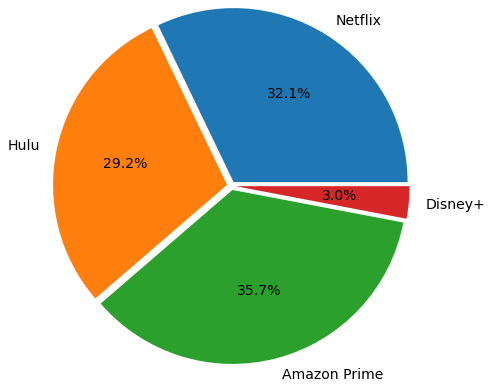

Netflix offers 1931 tv-shows
Hulu offers 1754 tv-shows
Prime offers 2144 tv-shows
Disney+ offers 180 tv-shows


In [ ]:
#Dataframes for # of TV series for each streaming service 
netflix_sum = df['Netflix'].sum()
hulu_sum = df['Hulu'].sum()
prime_sum = df['Prime Video'].sum()
disney_sum = df['Disney+'].sum()

market_shares = [netflix_sum, hulu_sum, prime_sum, disney_sum]
labels = ('Netflix', 'Hulu', 'Amazon Prime', 'Disney+')
sep = (0.05, 0.05, 0.05, 0.05)

fig, ax = plt.subplots()

ax.pie(market_shares,
      explode=sep,
      labels = labels,
      autopct = '%.1f%%',
      radius=2,
     textprops={'fontsize': 14})

plt.show()

print('Netflix offers ' + str(netflix_sum) + ' tv-shows')
print('Hulu offers ' + str(hulu_sum) + ' tv-shows')
print('Prime offers ' + str(prime_sum) + ' tv-shows')
print('Disney+ offers ' + str(disney_sum) + ' tv-shows')

Prime Video is the leader in available TV series, followed by Netflix, then Hulu, as Disney is drastically the last in available TV series.




##Streaming service with highest mean in TV series rating (by IMDb score)

In [ ]:
labels = ['Netflix', 'Hulu', 'Prime Video', 'Disney+']

In [ ]:
for i in labels:
  df['rating_'+i] = df['IMDb'] * df[i]

In [ ]:
imdb_platforms = df.replace(0, np.nan)


In [ ]:
imdb_platforms = imdb_platforms[['rating_Netflix', 'rating_Hulu', 'rating_Prime Video', 'rating_Disney+']].mean().reset_index()
imdb_platforms.columns = ['ratings', 'mean']
imdb_platforms.sort_values(by='mean', ascending=False)

,ratings,mean
2,rating_Prime Video,7.179801
0,rating_Netflix,7.163280
1,rating_Hulu,7.061107
3,rating_Disney+,6.923669


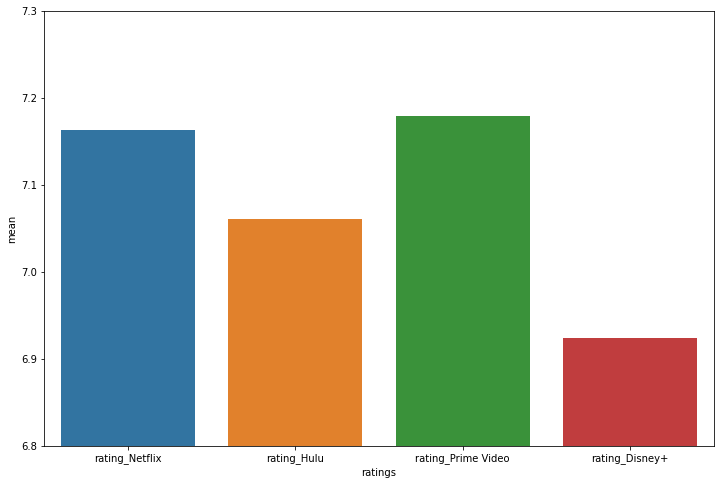

In [ ]:
plt.figure(figsize=(12,8))
ax = sns.barplot(x="ratings", y="mean", data=imdb_platforms)
l = ax.set(ylim=(6.8, 7.3))

Though Prime is again the leader in this category, the differences in means are not drastic and very narrow, especially between Prime and Netflix.

##Streaming service with the most highly rated TV series (by IMDb score)

In [ ]:
#Dataframes for streaming services
netflix_shows = df.loc[df['Netflix'] == 1].drop(['Hulu', 'Prime Video', 'Disney+'], axis=1)
hulu_shows = df.loc[df['Hulu'] == 1].drop(['Netflix', 'Prime Video', 'Disney+'], axis=1)
prime_shows = df.loc[df['Prime Video'] == 1].drop(['Hulu', 'Netflix', 'Disney+'], axis=1)
disney_shows = df.loc[df['Disney+'] == 1].drop(['Hulu', 'Prime Video', 'Netflix'], axis=1)

In [ ]:
top_netflix_shows = netflix_shows['IMDb'] > 8
top_hulu_shows = hulu_shows['IMDb'] > 8 
top_prime_shows = prime_shows['IMDb'] > 8
top_disney_shows = disney_shows['IMDb'] > 8

top_rated_shows = pd.DataFrame({
    'Platforms' : ['Netflix', 
                   'Hulu', 
                   'Prime Video', 
                   'Disney'],
    'Total highly rated shows' : [top_netflix_shows.sum(),
                                  top_hulu_shows.sum(),
                                  top_prime_shows.sum(),
                                  top_disney_shows.sum()]})

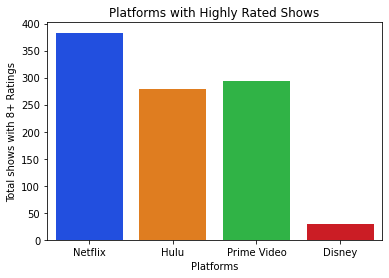

,Total highly rated shows
Platforms,
Netflix,383
Hulu,279
Prime Video,293
Disney,30


In [ ]:
sns.barplot(x = top_rated_shows['Platforms'],
            y = top_rated_shows['Total highly rated shows'],
            data = top_rated_shows,
           palette = 'bright')

plt.xlabel('Platforms')
plt.ylabel('Total shows with 8+ Ratings')
plt.title('Platforms with Highly Rated Shows')
plt.show()

top_rated_shows = top_rated_shows.set_index('Platforms')
display(top_rated_shows)

Netflix has the most highly-rated tv series (series with IMBd scores >8), followed by Prime Video, Hulu, and Disney, which has the least number of highly-rated TV series significantly.






##Which streaming services are the top 10 highest-rated TV series on?

<Figure size 576x576 with 0 Axes>

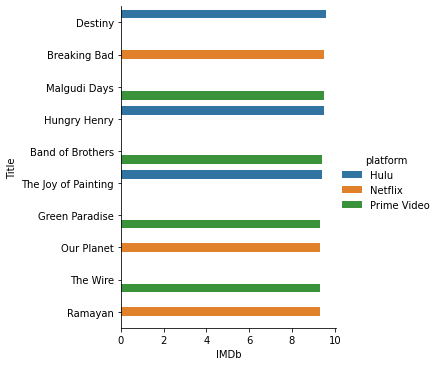

In [ ]:
df['platform'] = df[['Netflix', 'Hulu', 'Prime Video', 'Disney+']].idxmax(axis=1)

overall_top_10 = df.sort_values(by='IMDb', ascending=False).head(10)

plt.figure(figsize=(8,8))
sns.catplot(x='IMDb', y='Title', data=overall_top_10,hue='platform', kind='bar')
plt.show()

Though Hulu has the highest-rated TV series on IMBd, "Destiny", Prime Video has the most TV series in the top 10 highest rated. 

#Statistical Analysis

The research will determine which streaming service has the highest average  IMDb rating, comparing Netflix and Prime Video. Is there a statistically significant difference in the mean rating of shows on Netflix vs. Prime Video? 
<br> **Hypothesis:**<br> Ho: mean rating of shows on Netflix = mean rating of shows on PrimeVideo<br> Ha: mean rating of shows on Netflix <> mean rating of shows on Prime Video.<br> 
**Hypothesis: Prime Video has the higher mean IMDb rating. I will test my hypothesis by an independent sample t-tests.**


## Descriptive Statistics

In [ ]:
from scipy import stats

In [ ]:
def series_statistics (column): 
  print('statistics for column: {}'.format(column.name))
  print('The max value in the column: {}'.format(column.max()))
  print('The min value in the column: {}'.format(column.min()))
  print('The mode value in the column: {}'.format(column.mode()))
  print('The median value in the column: {}'.format(column.median()))
  print('The mean of the column: {}'.format(column.mean()))
  print('The std of the column: {}'.format(column.std()))

In [ ]:
series_statistics(netflix_shows['IMDb'])

statistics for column: IMDb
The max value in the column: 9.5
The min value in the column: 1.0
The mode value in the column: 0    7.4
dtype: float64
The median value in the column: 7.4
The mean of the column: 7.163279955825518
The std of the column: 1.0883380093915715


In [ ]:
netflix_shows['IMDb'].describe()

count    1811.000000
mean        7.163280
std         1.088338
min         1.000000
25%         6.600000
50%         7.400000
75%         8.000000
max         9.500000
Name: IMDb, dtype: float64

In [ ]:
series_statistics(prime_shows['IMDb'])

statistics for column: IMDb
The max value in the column: 9.5
The min value in the column: 1.8
The mode value in the column: 0    7.4
dtype: float64
The median value in the column: 7.4
The mean of the column: 7.1798010711553095
The std of the column: 1.1335097577041378


In [ ]:
prime_shows['IMDb'].describe()

count    1307.000000
mean        7.179801
std         1.133510
min         1.800000
25%         6.600000
50%         7.400000
75%         8.000000
max         9.500000
Name: IMDb, dtype: float64

## T-test

In [ ]:
stats.ttest_ind(netflix_shows.dropna()['IMDb'], prime_shows.dropna()['IMDb'])

Ttest_indResult(statistic=-1.7391632139241453, pvalue=0.08249762304008312)

There is a difference of 1.73 standard deviations between these two means. But is this just due to random chance, or is that difference significant? The p-value is extremely small, implying that this is a real difference. These results lead us to reject the null hypothesis that there is no difference between Netflix's and Prime Video's IMDb mean.



## Confidence Interval

To calculate the confidence interval, take your mean difference plus or minus the *margin of error*, which is calculated as your standard error of the mean difference times the test statistic of `1.96`.

In [ ]:
# Calculate the sample size, mean, and variance of each sample.
import math
sample_1_n = netflix_shows.shape[0]
sample_2_n = prime_shows.shape[0]
sample_1_mean = netflix_shows['IMDb'].mean()
sample_2_mean = prime_shows['IMDb'].mean()
sample_1_var = netflix_shows['IMDb'].var()
sample_2_var = prime_shows['IMDb'].var()

In [ ]:
# Calculate the standard error and compute the confidence intervals.

import math
std_err_difference = math.sqrt((sample_1_var/sample_1_n)+(sample_2_var/sample_2_n))

mean_difference = sample_2_mean - sample_1_mean

margin_of_error = 1.96 * std_err_difference
ci_lower = mean_difference - margin_of_error
ci_upper = mean_difference + margin_of_error

print("The difference in means at the 95% confidence interval is between "+str(ci_lower)+" and "+str(ci_upper)+".")

The difference in means at the 95% confidence interval is between -0.05173295764985962 and 0.08477518830944351.


# Conclusion

Through thorough analysis, the t-test concluded that there is a difference between Netflix's and Prime Video's IMDb mean. Though we can reject the null hypothesis, the hypothesis of Prime Video's higher mean is true. 

While comparing the different streaming services, Prime Video is the leader in almost every category except the quantity of highly-rated TV series, where Netflix leads by 90 more TV series with an IMDb score >8. In all categories (except the tie in which platform the top 10 highest-rated TV series are streaming as Hulu ties Netflix), Hulu is the 3rd top streaming service, and Disney+ is significantly the last.

 These findings will be valuable for consumers, helping new subscribers see which streaming service has the most value and assisting current subscribers to decide whether to stick to their streaming service, change services, or even subscribe to additional services. These findings will also help the streaming services determine if they should acquire higher-rated TV shows, create or acquire more highly-rated content to their services. Additionally, these findings would benefit advertising and marketing teams and producers contemplating which service to work with. 